# Klasifikasi Gambar menggunakan CNN

Notebook ini merupakan bagian dari buku **Fundamental Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **Bab 15 - Klasifikasi Gambar: CNN.**

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Parameter training
epochs = 25
batch_size = 32
image_size = (150, 150)
random_seed = 42

np.random.seed(random_seed)
tf.random.set_seed(random_seed)

## Data Ingestion

In [3]:
# Membuat augmentator
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
)
train_generator = train_datagen.flow_from_directory(
    r'../datasets/dogs-vs-cats/training_set',
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_generator = test_datagen.flow_from_directory(
    r'../datasets/dogs-vs-cats/test_set', 
    batch_size=batch_size,
    target_size=image_size,
    class_mode='categorical',
    shuffle=False
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Exploratory Data Analysis

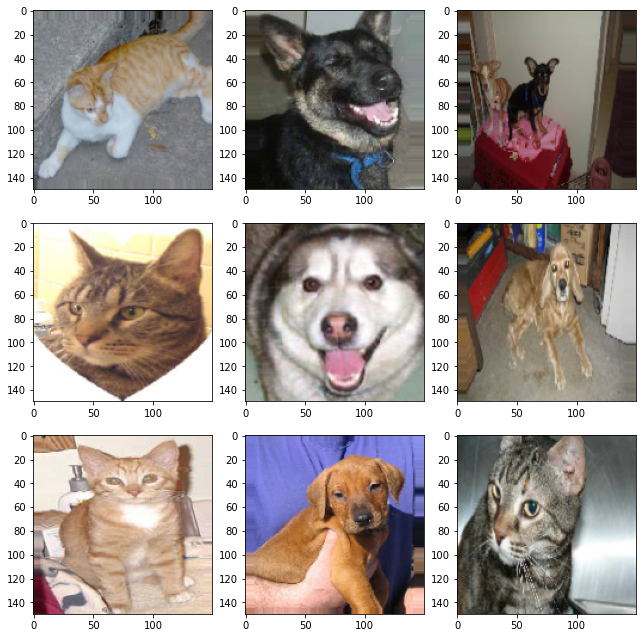

In [4]:
# Menampilkan contoh gambar pada dataset
fig = plt.figure(figsize=(9,9))
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    for x, y in train_generator:
        ax.imshow(x[0])
        break

fig.tight_layout()

In [5]:
# Menampilkan target kelas
train_generator.class_indices

{'cats': 0, 'dogs': 1}

## Training

In [6]:
# Membuat arsitektur model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=train_generator.image_shape))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [7]:
# Kompilasi model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [8]:
# Regularization
earlystop = tf.keras.callbacks.EarlyStopping(patience=10)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [9]:
# Lakukan training menggunakan data latih
H = model.fit(train_generator, validation_data=test_generator, epochs=epochs, callbacks=callbacks)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/25
250/250 [==============================] - 167s 669ms/step - loss: 0.9321 - accuracy: 0.5961 - val_loss: 0.8666 - val_accuracy: 0.5005
Epoch 2/25
250/250 [==============================] - 64s 256ms/step - loss: 0.6605 - accuracy: 0.6681 - val_loss: 1.2399 - val_accuracy: 0.5110
Epoch 3/25
250/250 [==============================] - 66s 266ms/step - loss: 0.5656 - accuracy: 0.7219 - val_loss: 0.6524 - val_accuracy: 0.6955
Epoch 4/25
250/250 [==============================] - 67s 266ms/step - loss: 0.5111 - accuracy: 0.7533 - val_loss: 0.4971 - val_accuracy: 0.7660
Epoch 5/25
250/250 [==============================] - 68s 272ms/step - loss: 0.4947 - accuracy: 0.7674 - val_loss: 0.4591 - val_accuracy: 0.7855
Epoch 6/25
250/250 [==============================] - 67s 268ms/step - loss: 0.4432 - accuracy: 0.7899 - val_loss: 0.5791 - val_accuracy: 0.7355
Epoch 7/25
250/250 [================

## Evaluation

In [10]:
# Lakukan prediksi 
y_pred = model.predict(test_generator)

y_pred = np.argmax(y_pred, axis=1)
y_test = test_generator.classes

In [11]:
# Hitung statistik prediksi
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.83      0.92      0.87      1000
           1       0.91      0.81      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



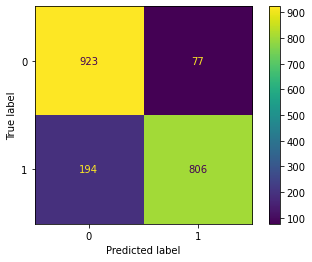

In [12]:
# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

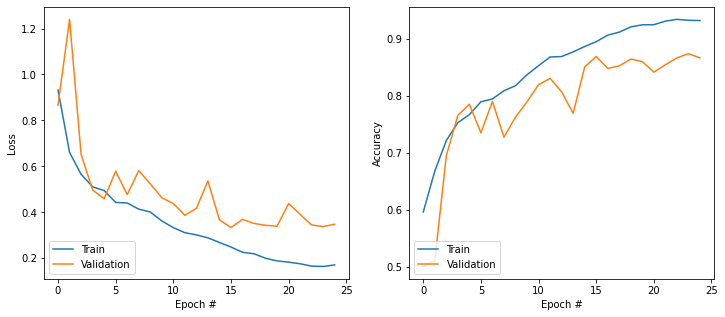

In [13]:
# Tampilkan statistik training model
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1, 2, 1)
plt.plot(np.arange(0, epochs), H.history["loss"], label="Train")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="Validation")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend(loc="lower left")

ax2 = plt.subplot(1, 2, 2, sharex = ax1)
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="Train")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="Validation")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower left")

## Prediction

In [14]:
# Lakukan prediksi
pred_img = tf.keras.preprocessing.image.load_img('../datasets/dogs-vs-cats/training_set/cats/cat.1.jpg', target_size=image_size)
pred_img = tf.keras.preprocessing.image.img_to_array(pred_img)
pred_img = pred_img / 255
pred_img = np.expand_dims(pred_img, axis=0)

predicted = model.predict(pred_img)
predicted = np.argmax(predicted, axis=1)[0]
inv_map = {v: k for k, v in train_generator.class_indices.items()}
inv_map[predicted]

'cats'

## Persistance

In [15]:
# Simpan pemetaan kelas
import joblib
joblib.dump(inv_map, '../model/animals_dict.joblib')

# Simpan model
import os
os.mkdir('../model/animals')
model.save('../model/animals')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ../model/animals\assets
